In [ ]:
# https://github.com/lewiuberg/visual-automata
!pip install automata-lib
!pip install pandas
!pip install graphviz
!pip install colormath
!pip install jupyterlab
!pip install visual-automata

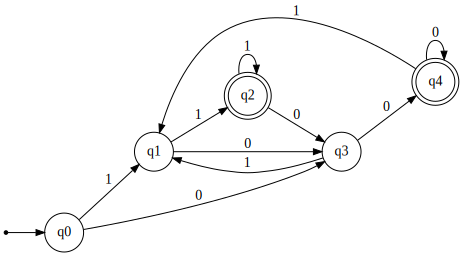

In [ ]:
from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA

dfa = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

dfa.show_diagram()

In [ ]:
# (bab+bbb)a*b*(a*+b*)(ba)*(aba)(bab+aba)*bb(a+b)*(bab+aba)(a+b)*
# (1+0)*1*0*(101+01+000)(1+0)*(101+00)*(111+00+101)(1+0)*

"""
for each symbol = 1 state
+  - or
* - repeat as many times
"""

def regex2dfa(regex: str, alphabet: tuple):
    states = []
    state_count = 0
    for char in regex:
        if char in alphabet:
            states.append(f"q{state_count}")
            state_count = state_count+1
    print(states)

    # operators
    # or


regex2dfa("(abbbcaab)", ("a", "b", "c"))

['q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7']


In [ ]:
# https://www.youtube.com/watch?v=LzbXsEmqyC0
!pip install vcsn

ERROR: Could not find a version that satisfies the requirement vcsn (from versions: none)
ERROR: No matching distribution found for vcsn


In [ ]:
!pip install graphviz

In [ ]:
import re
import graphviz

class State:
    def __init__(self, name, is_final=False):
        self.name = name
        self.is_final = is_final
        self.transitions = {}

class DFA:
    def __init__(self, states, start_state, alphabet):
        self.states = states
        self.start_state = start_state
        self.alphabet = alphabet

    def get_transition(self, state, symbol):
        return self.states[state].transitions.get(symbol)

    def add_transition(self, state1, symbol, state2):
        self.states[state1].transitions[symbol] = state2

    def visualize(self, filename):
        dot = graphviz.Digraph()

        for state in self.states:
            node = self.states[state].name
            is_final = "doublecircle" if self.states[state].is_final else ""
            dot.node(node, style=is_final)

        for state in self.states:
            for symbol in self.alphabet:
                transition_state = self.get_transition(state, symbol)
                if transition_state:
                    dot.edge(self.states[state].name, self.states[transition_state].name, label=symbol)

        dot.render(filename, view=True)

def to_dfa(regex, alphabet=['0', '1']):
    # Convert regex to NFA
    nfa = nfa_from_regex(regex, alphabet)

    # Convert NFA to DFA
    dfa = dfa_from_nfa(nfa, alphabet)

    return dfa

def nfa_from_regex(regex, alphabet=['0', '1']):
    # Implementation of Thompson's construction algorithm to convert regex to NFA
    # ...
    # (You can find the implementation of Thompson's construction algorithm in the provided documentation)

def dfa_from_nfa(nfa, alphabet):
    # Convert NFA to DFA using subset construction algorithm

    # 1. Create an initial DFA state that is the epsilon closure of the initial NFA state
    dfa_states = {frozenset(nfa.epsilon_closure(nfa.start_state)): nfa.start_state}
    dfa_start_state = 0

    # 2. Create an empty set of DFA states to be processed
    to_process = {dfa_start_state}

    # 3. While there are DFA states to be processed
    while to_process:
        # 3.a. Remove a DFA state from the set
        state = to_process.pop()

        # 3.b. For each symbol in the alphabet
        for symbol in alphabet:
            # 3.b.i. Compute the set of NFA states reachable from the current DFA state by reading the symbol
            reachable = {nfa_states[s] for s in state if nfa.get_transition(s, symbol)}

            # 3.b.ii. Compute the epsilon closure of the reachable set
            closure = nfa.epsilon_closure(reachable)

            # 3.b.iii. If this set of NFA states has not been seen before
            if closure not in dfa_states:
                # 3.b.iii.a. Add the set to the DFA states
                dfa_states[closure] = len(dfa_states)
                # 3.b.iii.b. Add the new DFA state to the set of DFA states to be processed
                to_process.add(dfa_states[closure])

            # 3.b.iv. Add a transition from the current DFA state to the new DFA state
            dfa_transition = dfa_states[state

In [ ]:
!pip install automaton

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
import automaton
import graphviz

def regex_to_dfa(regex):
    machine = automaton.DFA.from_regex(regex)
    return machine

def visualize_dfa(machine, filename):
    graph = graphviz.Digraph()
    states = set()
    transitions = {}

    for state in machine.states:
        states.add(state.name)
        for input_symbol, next_state in state.transitions.items():
            transitions[(state.name, input_symbol)] = next_state.name

    graph.node_attr['style'] = 'rounded,filled'
    for state in states:
        graph.node(state)

    for transition in transitions:
        graph.edge(transition[0], transitions[transition], label=transition[1])

    graph.render(filename, format='png')

if __name__ == "__main__":
    regex = "a(b|c)*d"
    dfa = regex_to_dfa(regex)
    visualize_dfa(dfa, "dfa.png")

AttributeError: module 'automaton' has no attribute 'DFA'

In [ ]:
!pip install networkx

In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt

'''

def regex_to_dfa(regex):
    """
    Convert a regular expression to a deterministic finite automaton (DFA).
    """
    nfa = DFA.from_regex(regex)
    dfa = nfa.to_deterministic()
    return dfa


def visualize_dfa(dfa, filename):
    """
    Visualize a deterministic finite automaton (DFA) and save the visualization to a file.
    """
    G = nx.DiGraph()

    # Add states as nodes
    for state in dfa.states:
        G.add_node(state.name, shape='doublecircle' if state.is_final else 'circle')

    # Add transitions as edges
    for state in dfa.states:
        for symbol, next_state in state.transitions.items():
            G.add_edge(state.name, next_state.name, label=symbol)

    # Visualize the DFA
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=12)
    plt.savefig(filename)


def main():
    regex = input("Enter a regular expression: ")
    dfa = regex_to_dfa(regex)
    visualize_dfa(dfa, "dfa.png")
    print("DFA visualization saved to dfa.png")


if __name__ == "__main__":
    main() '''

import automaton
dir(automaton.__builtins__)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
!pip install pynfa

ERROR: Could not find a version that satisfies the requirement pynfa (from versions: none)
ERROR: No matching distribution found for pynfa


In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt
from automata.fa.dfa import DFA


def regex_to_dfa(regex):
    """
    Convert a regular expression to a deterministic finite automaton (DFA).
    """
    nfa = DFA.from_regex(regex)
    dfa = nfa.to_deterministic()
    return dfa


def visualize_dfa(dfa, filename):
    """
    Visualize a deterministic finite automaton (DFA) and save the visualization to a file.
    """
    G = nx.DiGraph()

    # Add states as nodes
    for state in dfa.states:
        G.add_node(state.name, shape='doublecircle' if state.is_final else 'circle')

    # Add transitions as edges
    for state in dfa.states:
        for symbol, next_state in state.transitions.items():
            G.add_edge(state.name, next_state.name, label=symbol)

    # Visualize the DFA
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=12)
    plt.savefig(filename)


def main():
    regex = input("Enter a regular expression: ")
    dfa = regex_to_dfa(regex)
    visualize_dfa(dfa, "dfa.png")
    print("DFA visualization saved to dfa.png")


if __name__ == "__main__":
    main()

Enter a regular expression: a


AttributeError: type object 'DFA' has no attribute 'from_regex'

In [ ]:
from os import popen
import time

class Automata:
    """class to represent an Automata"""

    def __init__(self, language = set(['0', '1'])):
        self.states = set()
        self.startstate = None
        self.finalstates = []
        self.transitions = dict()
        self.language = language

    @staticmethod
    def epsilon():
        return ":e:"

    def setstartstate(self, state):
        self.startstate = state
        self.states.add(state)

    def addfinalstates(self, state):
        if isinstance(state, int):
            state = [state]
        for s in state:
            if s not in self.finalstates:
                self.finalstates.append(s)

    def addtransition(self, fromstate, tostate, inp):
        if isinstance(inp, str):
            inp = set([inp])
        self.states.add(fromstate)
        self.states.add(tostate)
        if fromstate in self.transitions:
            if tostate in self.transitions[fromstate]:
                self.transitions[fromstate][tostate] = self.transitions[fromstate][tostate].union(inp)
            else:
                self.transitions[fromstate][tostate] = inp
        else:
            self.transitions[fromstate] = {tostate : inp}

    def addtransition_dict(self, transitions):
        for fromstate, tostates in transitions.items():
            for state in tostates:
                self.addtransition(fromstate, state, tostates[state])

    def gettransitions(self, state, key):
        if isinstance(state, int):
            state = [state]
        trstates = set()
        for st in state:
            if st in self.transitions:
                for tns in self.transitions[st]:
                    if key in self.transitions[st][tns]:
                        trstates.add(tns)
        return trstates

    def getEClose(self, findstate):
        allstates = set()
        states = set([findstate])
        while len(states)!= 0:
            state = states.pop()
            allstates.add(state)
            if state in self.transitions:
                for tns in self.transitions[state]:
                    if Automata.epsilon() in self.transitions[state][tns] and tns not in allstates:
                        states.add(tns)
        return allstates

    def display(self):
        print "states:", self.states
        print "start state: ", self.startstate
        print "final states:", self.finalstates
        print "transitions:"
        for fromstate, tostates in self.transitions.items():
            for state in tostates:
                for char in tostates[state]:
                    print "  ",fromstate, "->", state, "on '"+char+"'",
            print

    def getPrintText(self):
        text = "language: {" + ", ".join(self.language) + "}\n"
        text += "states: {" + ", ".join(map(str,self.states)) + "}\n"
        text += "start state: " + str(self.startstate) + "\n"
        text += "final states: {" + ", ".join(map(str,self.finalstates)) + "}\n"
        text += "transitions:\n"
        linecount = 5
        for fromstate, tostates in self.transitions.items():
            for state in tostates:
                for char in tostates[state]:
                    text += "    " + str(fromstate) + " -> " + str(state) + " on '" + char + "'\n"
                    linecount +=1
        return [text, linecount]

    def newBuildFromNumber(self, startnum):
        translations = {}
        for i in list(self.states):
            translations[i] = startnum
            startnum += 1
        rebuild = Automata(self.language)
        rebuild.setstartstate(translations[self.startstate])
        rebuild.addfinalstates(translations[self.finalstates[0]])
        for fromstate, tostates in self.transitions.items():
            for state in tostates:
                rebuild.addtransition(translations[fromstate], translations[state], tostates[state])
        return [rebuild, startnum]

    def newBuildFromEquivalentStates(self, equivalent, pos):
        rebuild = Automata(self.language)
        for fromstate, tostates in self.transitions.items():
            for state in tostates:
                rebuild.addtransition(pos[fromstate], pos[state], tostates[state])
        rebuild.setstartstate(pos[self.startstate])
        for s in self.finalstates:
            rebuild.addfinalstates(pos[s])
        return rebuild

    def getDotFile(self):
        dotFile = "digraph DFA {\nrankdir=LR\n"
        if len(self.states) != 0:
            dotFile += "root=s1\nstart [shape=point]\nstart->s%d\n" % self.startstate
            for state in self.states:
                if state in self.finalstates:
                    dotFile += "s%d [shape=doublecircle]\n" % state
                else:
                    dotFile += "s%d [shape=circle]\n" % state
            for fromstate, tostates in self.transitions.items():
                for state in tostates:
                    for char in tostates[state]:
                        dotFile += 's%d->s%d [label="%s"]\n' % (fromstate, state, char)
        dotFile += "}"
        return dotFile

class BuildAutomata:
    """class for building e-nfa basic structures"""

    @staticmethod
    def basicstruct(inp):
        state1 = 1
        state2 = 2
        basic = Automata()
        basic.setstartstate(state1)
        basic.addfinalstates(state2)
        basic.addtransition(1, 2, inp)
        return basic

    @staticmethod
    def plusstruct(a, b):
        [a, m1] = a.newBuildFromNumber(2)
        [b, m2] = b.newBuildFromNumber(m1)
        state1 = 1
        state2 = m2
        plus = Automata()
        plus.setstartstate(state1)
        plus.addfinalstates(state2)
        plus.addtransition(plus.startstate, a.startstate, Automata.epsilon())
        plus.addtransition(plus.startstate, b.startstate, Automata.epsilon())
        plus.addtransition(a.finalstates[0], plus.finalstates[0], Automata.epsilon())
        plus.addtransition(b.finalstates[0], plus.finalstates[0], Automata.epsilon())
        plus.addtransition_dict(a.transitions)
        plus.addtransition_dict(b.transitions)
        return plus

    @staticmethod
    def dotstruct(a, b):
        [a, m1] = a.newBuildFromNumber(1)
        [b, m2] = b.newBuildFromNumber(m1)
        state1 = 1
        state2 = m2-1
        dot = Automata()
        dot.setstartstate(state1)
        dot.addfinalstates(state2)
        dot.addtransition(a.finalstates[0], b.startstate, Automata.epsilon())
        dot.addtransition_dict(a.transitions)
        dot.addtransition_dict(b.transitions)
        return dot

    @staticmethod
    def starstruct(a):
        [a, m1] = a.newBuildFromNumber(2)
        state1 = 1
        state2 = m1
        star = Automata()
        star.setstartstate(state1)
        star.addfinalstates(state2)
        star.addtransition(star.startstate, a.startstate, Automata.epsilon())
        star.addtransition(star.startstate, star.finalstates[0], Automata.epsilon())
        star.addtransition(a.finalstates[0], star.finalstates[0], Automata.epsilon())
        star.addtransition(a.finalstates[0], a.startstate, Automata.epsilon())
        star.addtransition_dict(a.transitions)
        return star


class DFAfromNFA:
    """class for building dfa from e-nfa and minimise it"""

    def __init__(self, nfa):
        self.buildDFA(nfa)
        self.minimise()

    def getDFA(self):
        return self.dfa

    def getMinimisedDFA(self):
        return self.minDFA

    def displayDFA(self):
        self.dfa.display()

    def displayMinimisedDFA(self):
        self.minDFA.display()

    def buildDFA(self, nfa):
        allstates = dict()
        eclose = dict()
        count = 1
        state1 = nfa.getEClose(nfa.startstate)
        eclose[nfa.startstate] = state1
        dfa = Automata(nfa.language)
        dfa.setstartstate(count)
        states = [[state1, count]]
        allstates[count] = state1
        count +=  1
        while len(states) != 0:
            [state, fromindex] = states.pop()
            for char in dfa.language:
                trstates = nfa.gettransitions(state, char)
                for s in list(trstates)[:]:
                    if s not in eclose:
                        eclose[s] = nfa.getEClose(s)
                    trstates = trstates.union(eclose[s])
                if len(trstates) != 0:
                    if trstates not in allstates.values():
                        states.append([trstates, count])
                        allstates[count] = trstates
                        toindex = count
                        count +=  1
                    else:
                        toindex = [k for k, v in allstates.iteritems() if v  ==  trstates][0]
                    dfa.addtransition(fromindex, toindex, char)
        for value, state in allstates.iteritems():
            if nfa.finalstates[0] in state:
                dfa.addfinalstates(value)
        self.dfa = dfa

    def acceptsString(self, string):
        currentstate = self.dfa.startstate
        for ch in string:
            if ch==":e:":
                continue
            st = list(self.dfa.gettransitions(currentstate, ch))
            if len(st) == 0:
                return False
            currentstate = st[0]
        if currentstate in self.dfa.finalstates:
            return True
        return False

    def minimise(self):
        states = list(self.dfa.states)
        n = len(states)
        unchecked = dict()
        count = 1
        distinguished = []
        equivalent = dict(zip(range(len(states)), [{s} for s in states]))
        pos = dict(zip(states,range(len(states))))
        for i in range(n-1):
            for j in range(i+1, n):
                if not ([states[i], states[j]] in distinguished or [states[j], states[i]] in distinguished):
                    eq = 1
                    toappend = []
                    for char in self.dfa.language:
                        s1 = self.dfa.gettransitions(states[i], char)
                        s2 = self.dfa.gettransitions(states[j], char)
                        if len(s1) != len(s2):
                            eq = 0
                            break
                        if len(s1) > 1:
                            raise BaseException("Multiple transitions detected in DFA")
                        elif len(s1) == 0:
                            continue
                        s1 = s1.pop()
                        s2 = s2.pop()
                        if s1 != s2:
                            if [s1, s2] in distinguished or [s2, s1] in distinguished:
                                eq = 0
                                break
                            else:
                                toappend.append([s1, s2, char])
                                eq = -1
                    if eq == 0:
                        distinguished.append([states[i], states[j]])
                    elif eq == -1:
                        s = [states[i], states[j]]
                        s.extend(toappend)
                        unchecked[count] = s
                        count += 1
                    else:
                        p1 = pos[states[i]]
                        p2 = pos[states[j]]
                        if p1 != p2:
                            st = equivalent.pop(p2)
                            for s in st:
                                pos[s] = p1
                            equivalent[p1] = equivalent[p1].union(st)
        newFound = True
        while newFound and len(unchecked) > 0:
            newFound = False
            toremove = set()
            for p, pair in unchecked.items():
                for tr in pair[2:]:
                    if [tr[0], tr[1]] in distinguished or [tr[1], tr[0]] in distinguished:
                        unchecked.pop(p)
                        distinguished.append([pair[0], pair[1]])
                        newFound = True
                        break
        for pair in unchecked.values():
            p1 = pos[pair[0]]
            p2 = pos[pair[1]]
            if p1 != p2:
                st = equivalent.pop(p2)
                for s in st:
                    pos[s] = p1
                equivalent[p1] = equivalent[p1].union(st)
        if len(equivalent) == len(states):
            self.minDFA = self.dfa
        else:
            self.minDFA = self.dfa.newBuildFromEquivalentStates(equivalent, pos)

class NFAfromRegex:
    """class for building e-nfa from regular expressions"""

    def __init__(self, regex):
        self.star = '*'
        self.plus = '+'
        self.dot = '.'
        self.openingBracket = '('
        self.closingBracket = ')'
        self.operators = [self.plus, self.dot]
        self.regex = regex
        self.alphabet = [chr(i) for i in range(65,91)]
        self.alphabet.extend([chr(i) for i in range(97,123)])
        self.alphabet.extend([chr(i) for i in range(48,58)])
        self.buildNFA()

    def getNFA(self):
        return self.nfa

    def displayNFA(self):
        self.nfa.display()

    def buildNFA(self):
        language = set()
        self.stack = []
        self.automata = []
        previous = "::e::"
        for char in self.regex:
            if char in self.alphabet:
                language.add(char)
                if previous != self.dot and (previous in self.alphabet or previous in [self.closingBracket,self.star]):
                    self.addOperatorToStack(self.dot)
                self.automata.append(BuildAutomata.basicstruct(char))
            elif char  ==  self.openingBracket:
                if previous != self.dot and (previous in self.alphabet or previous in [self.closingBracket,self.star]):
                    self.addOperatorToStack(self.dot)
                self.stack.append(char)
            elif char  ==  self.closingBracket:
                if previous in self.operators:
                    raise BaseException("Error processing '%s' after '%s'" % (char, previous))
                while(1):
                    if len(self.stack) == 0:
                        raise BaseException("Error processing '%s'. Empty stack" % char)
                    o = self.stack.pop()
                    if o == self.openingBracket:
                        break
                    elif o in self.operators:
                        self.processOperator(o)
            elif char == self.star:
                if previous in self.operators or previous  == self.openingBracket or previous == self.star:
                    raise BaseException("Error processing '%s' after '%s'" % (char, previous))
                self.processOperator(char)
            elif char in self.operators:
                if previous in self.operators or previous  == self.openingBracket:
                    raise BaseException("Error processing '%s' after '%s'" % (char, previous))
                else:
                    self.addOperatorToStack(char)
            else:
                raise BaseException("Symbol '%s' is not allowed" % char)
            previous = char
        while len(self.stack) != 0:
            op = self.stack.pop()
            self.processOperator(op)
        if len(self.automata) > 1:
            print self.automata
            raise BaseException("Regex could not be parsed successfully")
        self.nfa = self.automata.pop()
        self.nfa.language = language

    def addOperatorToStack(self, char):
        while(1):
            if len(self.stack) == 0:
                break
            top = self.stack[len(self.stack)-1]
            if top == self.openingBracket:
                break
            if top == char or top == self.dot:
                op = self.stack.pop()
                self.processOperator(op)
            else:
                break
        self.stack.append(char)

    def processOperator(self, operator):
        if len(self.automata) == 0:
            raise BaseException("Error processing operator '%s'. Stack is empty" % operator)
        if operator == self.star:
            a = self.automata.pop()
            self.automata.append(BuildAutomata.starstruct(a))
        elif operator in self.operators:
            if len(self.automata) < 2:
                raise BaseException("Error processing operator '%s'. Inadequate operands" % operator)
            a = self.automata.pop()
            b = self.automata.pop()
            if operator == self.plus:
                self.automata.append(BuildAutomata.plusstruct(b,a))
            elif operator == self.dot:
                self.automata.append(BuildAutomata.dotstruct(b,a))

def drawGraph(automata, file = ""):
    """From https://github.com/max99x/automata-editor/blob/master/util.py"""
    f = popen(r"dot -Tpng -o graph%s.png" % file, 'w')
    try:
        f.write(automata.getDotFile())
    except:
        raise BaseException("Error creating graph")
    finally:
        f.close()

def isInstalled(program):
    """From http://stackoverflow.com/questions/377017/test-if-executable-exists-in-python"""
    import os
    def is_exe(fpath):
        return os.path.isfile(fpath) and os.access(fpath, os.X_OK)
    fpath, fname = os.path.split(program)
    if fpath:
        if is_exe(program) or is_exe(program+".exe"):
            return True
    else:
        for path in os.environ["PATH"].split(os.pathsep):
            exe_file = os.path.join(path, program)
            if is_exe(exe_file) or is_exe(exe_file+".exe"):
                return True
    return False

In [ ]:
# holy 57EtF5CkXLa9ynsxybTciNgt4ckaHEQN i think the answer is in here
# https://github.com/caleb531/automata/tree/main/automata/fa
# especially:
# https://github.com/caleb531/automata/blob/main/automata/fa/nfa.py, from_regex()
# https://github.com/caleb531/automata/blob/main/automata/fa/dfa.py, from_nfa()

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi